# S16 T01 Advanced Machine Learning

## Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

### World Happiness Report
Happiness scored according to economic production, social support, etc.

In [59]:
# Read the data into a dataframe
df_raw = pd.read_csv('2019.csv', sep=',')

In [60]:
# See an example of the data
df_raw[df_raw['Country or region']=='Argentina']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
46,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.05


In [61]:
df_raw.sort_values(by = ['Country or region'])['Country or region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Lao

There are no regions, so I´ll rename the feature

In [62]:
df_raw = df_raw.rename(columns = {'Country or region' : 'Country'})

In [63]:
# Are ther any nulls?
df_raw.isnull().sum()

Overall rank                    0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [64]:
# Describe the posible values of the target
df_raw.Score.describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Distribution of the target variable')

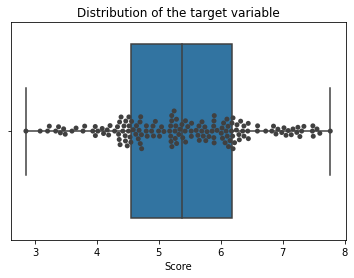

In [65]:
# What does it look like?
ax = sns.boxplot(x = df_raw['Score'], orient = 'h')
ax = sns.swarmplot(x = df_raw['Score'], orient = 'h', color=".25")
ax.set_title('Distribution of the target variable')

There are no outliers

In [66]:
features = df_raw.columns[3:9].values
print(f'Knowing {features}, I want to predict the Score')

Knowing ['GDP per capita' 'Social support' 'Healthy life expectancy'
 'Freedom to make life choices' 'Generosity' 'Perceptions of corruption'], I want to predict the Score


In [78]:
# Determine the features
X = df_raw[features].values
X

array([[1.34 , 1.587, 0.986, 0.596, 0.153, 0.393],
       [1.383, 1.573, 0.996, 0.592, 0.252, 0.41 ],
       [1.488, 1.582, 1.028, 0.603, 0.271, 0.341],
       [1.38 , 1.624, 1.026, 0.591, 0.354, 0.118],
       [1.396, 1.522, 0.999, 0.557, 0.322, 0.298],
       [1.452, 1.526, 1.052, 0.572, 0.263, 0.343],
       [1.387, 1.487, 1.009, 0.574, 0.267, 0.373],
       [1.303, 1.557, 1.026, 0.585, 0.33 , 0.38 ],
       [1.365, 1.505, 1.039, 0.584, 0.285, 0.308],
       [1.376, 1.475, 1.016, 0.532, 0.244, 0.226],
       [1.372, 1.548, 1.036, 0.557, 0.332, 0.29 ],
       [1.034, 1.441, 0.963, 0.558, 0.144, 0.093],
       [1.276, 1.455, 1.029, 0.371, 0.261, 0.082],
       [1.609, 1.479, 1.012, 0.526, 0.194, 0.316],
       [1.333, 1.538, 0.996, 0.45 , 0.348, 0.278],
       [1.499, 1.553, 0.999, 0.516, 0.298, 0.31 ],
       [1.373, 1.454, 0.987, 0.495, 0.261, 0.265],
       [1.356, 1.504, 0.986, 0.473, 0.16 , 0.21 ],
       [1.433, 1.457, 0.874, 0.454, 0.28 , 0.128],
       [1.269, 1.487, 0.92 , 0.

In [92]:
# Choose the target
label = ['Score']
y = np.ravel(df_raw[label].values) # use of ravel is because fit demanded a y with less dimensions
y

array([7.769, 7.6  , 7.554, 7.494, 7.488, 7.48 , 7.343, 7.307, 7.278,
       7.246, 7.228, 7.167, 7.139, 7.09 , 7.054, 7.021, 6.985, 6.923,
       6.892, 6.852, 6.825, 6.726, 6.595, 6.592, 6.446, 6.444, 6.436,
       6.375, 6.374, 6.354, 6.321, 6.3  , 6.293, 6.262, 6.253, 6.223,
       6.199, 6.198, 6.192, 6.182, 6.174, 6.149, 6.125, 6.118, 6.105,
       6.1  , 6.086, 6.07 , 6.046, 6.028, 6.021, 6.008, 5.94 , 5.895,
       5.893, 5.89 , 5.888, 5.886, 5.86 , 5.809, 5.779, 5.758, 5.743,
       5.718, 5.697, 5.693, 5.653, 5.648, 5.631, 5.603, 5.529, 5.525,
       5.523, 5.467, 5.432, 5.43 , 5.425, 5.386, 5.373, 5.339, 5.323,
       5.287, 5.285, 5.274, 5.265, 5.261, 5.247, 5.211, 5.208, 5.208,
       5.197, 5.192, 5.191, 5.175, 5.082, 5.044, 5.011, 4.996, 4.944,
       4.913, 4.906, 4.883, 4.812, 4.799, 4.796, 4.722, 4.719, 4.707,
       4.7  , 4.696, 4.681, 4.668, 4.639, 4.628, 4.587, 4.559, 4.548,
       4.534, 4.519, 4.516, 4.509, 4.49 , 4.466, 4.461, 4.456, 4.437,
       4.418, 4.39 ,

In [87]:
# Define the train and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30)

In [105]:
# Choose the parameters to test on Random Forest Regresor
parameters = {'RFR__random_state' : [5], 'RFR__n_estimators' : range(50,101,5),
              'RFR__min_samples_split' : [2,5,12,20], 'PCA__n_components' :[.95],
             'PCA__random_state' : [123]}


In [106]:
steps = [('scaler', StandardScaler()), ('PCA', PCA()), ('RFR', RandomForestRegressor())]

In [107]:
pipeline = Pipeline(steps) # define the pipeline object.

In [108]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('RFR', RandomForestRegressor())]),
             param_grid={'PCA__n_components': [0.95],
                         'PCA__random_state': [123],
                         'RFR__min_samples_split': [2, 5, 12, 20],
                         'RFR__n_estimators': range(50, 101, 5),
                         'RFR__random_state': [5]})

In [117]:
print("Model score = %3.2f" %(grid.score(X_test,y_test)))
print('Best params:',grid.best_params_)

Model score = 0.81
Best params: {'PCA__n_components': 0.95, 'PCA__random_state': 123, 'RFR__min_samples_split': 5, 'RFR__n_estimators': 65, 'RFR__random_state': 5}


In [114]:
pred = grid.predict(X_test)

In [116]:
res = pd.DataFrame({'predicted': pred, 'real': y_test})
res

,predicted,real
0,6.174121,6.021
1,5.588178,5.323
2,4.605543,5.529
3,7.031388,7.278
4,5.760018,5.648
5,3.885044,3.597
6,7.055857,7.480
7,4.514075,4.913
8,6.611653,6.446
9,6.929801,7.494


Text(0.5, 0, 'score')

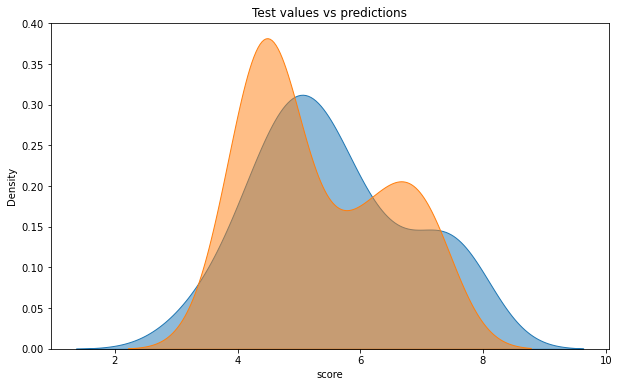

In [156]:
# Fig size
plt.figure(figsize=(10,6))
plt.title('Test values vs predictions')
sns.kdeplot(res.real,  fill=True, alpha=.5, label='Real')
sns.kdeplot(data=res, x="predicted",  fill=True, alpha=.5, label='Prediction')
plt.xlabel('score')


In [136]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
# the best mean squared error is the one closest to 0 
print('R Squared: ', metrics.r2_score(y_test,pred)) # how well fits dependent variables
# R squared is the score, it's better when is closer to 1

Mean Squared Error: 0.28092109471783067
R Squared:  0.8120773173730379


The plot and the metrics reflect that the model could be a little better. Maybe using more input data or trying with another scaler...

## Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

# Nivell 2
## Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

# Nivell 3
## Exercici 1
Realitza sentiment analysis al teu conjunt de dades.